In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_data.xlsx to marketing_data.xlsx


In [ ]:
marketing_data = pd.read_excel(r'marketing_data.xlsx', engine='openpyxl')
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0


In [ ]:
persentase_null_values = marketing_data.isnull().sum()/len(marketing_data)*100
persentase_null_values

ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Marital_Status       0.000000
 Income              1.071429
Dt_Customer          0.000000
Recency              0.000000
MntWines             0.000000
MntFruits            0.000000
MntMeatProducts      0.000000
MntFishProducts      0.000000
NumWebPurchases      0.000000
NumWebVisitsMonth    0.000000
AcceptedCmp3         0.000000
AcceptedCmp4         0.000000
AcceptedCmp5         0.000000
AcceptedCmp1         0.000000
AcceptedCmp2         0.000000
dtype: float64

In [ ]:
marketing_data.rename(columns = {' Income ':'Income'}, inplace = True)

In [ ]:
marketing_data['Income'] = marketing_data['Income'].str.replace('[$|,|.00]', '')
marketing_data['Income']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       84835 
1        5791 
2       67267 
3       32474 
4       21474 
         ...  
2235    66476 
2236     3156 
2237     4631 
2238    65819 
2239    94871 
Name: Income, Length: 2240, dtype: object

In [ ]:
marketing_data['Income'] = marketing_data['Income'].astype(float)
marketing_data['Income']

0       84835.0
1        5791.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236     3156.0
2237     4631.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [ ]:
marketing_data['Income'] = marketing_data['Income'].fillna(marketing_data['Income'].mean())

In [ ]:
marketing_data['Income'] = marketing_data['Income'].astype(int)
marketing_data['Income']

0       84835
1        5791
2       67267
3       32474
4       21474
        ...  
2235    66476
2236     3156
2237     4631
2238    65819
2239    94871
Name: Income, Length: 2240, dtype: int64

In [ ]:
marketing_data.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,35079.253125,49.109375,303.935714,26.302232,166.950000,37.525446,4.084821,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393
std,3246.662198,11.984069,31385.391456,28.962453,336.597393,39.773434,225.715373,54.628979,2.778714,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976
min,0.000000,1893.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,6381.000000,24.000000,23.750000,1.000000,16.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,33996.000000,49.000000,173.500000,8.000000,67.000000,12.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,58113.750000,74.000000,504.250000,33.000000,232.000000,50.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,27.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
persentase_null_values = marketing_data.isnull().sum()/len(marketing_data)*100
persentase_null_values

ID                   0.0
Year_Birth           0.0
Education            0.0
Marital_Status       0.0
Income               0.0
Dt_Customer          0.0
Recency              0.0
MntWines             0.0
MntFruits            0.0
MntMeatProducts      0.0
MntFishProducts      0.0
NumWebPurchases      0.0
NumWebVisitsMonth    0.0
AcceptedCmp3         0.0
AcceptedCmp4         0.0
AcceptedCmp5         0.0
AcceptedCmp1         0.0
AcceptedCmp2         0.0
dtype: float64

In [ ]:
marketing_data.dtypes

ID                    int64
Year_Birth            int64
Education            object
Marital_Status       object
Income                int64
Dt_Customer          object
Recency               int64
MntWines              int64
MntFruits             int64
MntMeatProducts       int64
MntFishProducts       int64
NumWebPurchases       int64
NumWebVisitsMonth     int64
AcceptedCmp3          int64
AcceptedCmp4          int64
AcceptedCmp5          int64
AcceptedCmp1          int64
AcceptedCmp2          int64
dtype: object

In [ ]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1826,1970,Graduation,Divorced,84835,6/16/14,0,189,104,379,111,4,1,0,0,0,0,0
1,1,1961,Graduation,Single,5791,6/15/14,0,464,5,64,7,7,5,0,0,0,0,1
2,10476,1958,Graduation,Married,67267,5/13/14,0,134,11,59,15,3,2,0,0,0,0,0
3,1386,1967,Graduation,Together,32474,5/11/14,0,10,0,1,0,1,7,0,0,0,0,0
4,5371,1989,Graduation,Single,21474,4/8/14,0,6,16,24,11,3,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476,3/7/13,99,372,18,126,47,5,4,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,3156,1/22/13,99,5,10,13,3,1,8,0,0,0,0,0
2237,22,1976,Graduation,Divorced,4631,12/3/12,99,185,2,88,15,6,8,0,0,0,0,0
2238,528,1978,Graduation,Married,65819,11/29/12,99,267,38,701,149,5,3,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


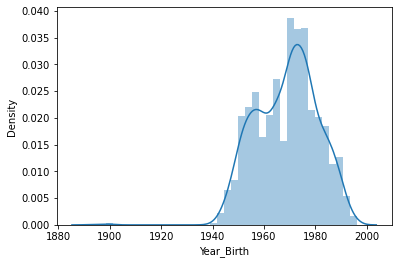

In [ ]:
sns.distplot(marketing_data['Year_Birth'])

In [ ]:
def my_func(marketing_data):
    if (marketing_data['Year_Birth'] >= 1965) & (marketing_data['Year_Birth'] <= 1980):
        Generation = 'Generation X'
    elif (marketing_data['Year_Birth'] >= 1981) & (marketing_data['Year_Birth'] <= 1996):
        Generation = 'Generation Y'
    elif (marketing_data['Year_Birth'] >= 1997) & (marketing_data['Year_Birth'] <= 2012):
        Generation = 'Generation Z'
    elif (marketing_data['Year_Birth'] >= 1946) & (marketing_data['Year_Birth'] <= 1964):
        Generation = 'The Baby Boomer'
    else:
        Generation = 'ELSE'
    return Generation

In [ ]:
marketing_data['Generation'] = marketing_data.apply(my_func, axis=1)
marketing_data['Generation']

0          Generation X
1       The Baby Boomer
2       The Baby Boomer
3          Generation X
4          Generation Y
             ...       
2235       Generation X
2236       Generation X
2237       Generation X
2238       Generation X
2239       Generation X
Name: Generation, Length: 2240, dtype: object

In [ ]:
count_Gen = marketing_data['Generation'].value_counts()
count_Gen

Generation X       1069
The Baby Boomer     759
Generation Y        385
ELSE                 27
Name: Generation, dtype: int64

In [ ]:
count_education = marketing_data['Education'].value_counts()
count_education

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
marketing_data['Education']= marketing_data['Education'].str.replace('2n Cycle', 'Master')
marketing_data['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           PhD
2236        Master
2237    Graduation
2238    Graduation
2239           PhD
Name: Education, Length: 2240, dtype: object

In [ ]:
count_education = marketing_data['Education'].value_counts()
count_education

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

Asumsi: 2nd Cycle adalah Master, Basic adalah lulusan SMA/High School. Sehingga  2nd Cycle digabungkan ke Master, dan Basic dibiarkan apa adanya.

https://www.quora.com/What-is-the-difference-between-a-second-cycle-program-and-a-master-s-degree

In [ ]:
count_Marital_Status = marketing_data['Marital_Status'].value_counts().to_frame()
count_Marital_Status

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
YOLO,2
Absurd,2


In [ ]:
char_to_replace = {'Married':'Have Family', 'Together':'Have Family', 'Single':'Not Have Family','Divorced':'Not Have Family','Widow':'Not Have Family', 'Alone':'Not Have Family', 'YOLO':'Not Have Family', 'Absurd':'Not Have Family'}
marketing_data['Marital_Status'] = marketing_data['Marital_Status'].replace(char_to_replace)
marketing_data['Marital_Status']

0       Not Have Family
1       Not Have Family
2           Have Family
3           Have Family
4       Not Have Family
             ...       
2235    Not Have Family
2236        Have Family
2237    Not Have Family
2238        Have Family
2239        Have Family
Name: Marital_Status, Length: 2240, dtype: object

In [ ]:
count_Marital_Status = marketing_data['Marital_Status'].value_counts().to_frame()
count_Marital_Status

,Marital_Status
Have Family,1444
Not Have Family,796


In [ ]:
marketing_data['Income']

0       84835
1        5791
2       67267
3       32474
4       21474
        ...  
2235    66476
2236     3156
2237     4631
2238    65819
2239    94871
Name: Income, Length: 2240, dtype: int64

In [ ]:
def my_func(marketing_data):
    if (marketing_data['Income'] >= 0) & (marketing_data['Income'] <= 2257):
        Level_Income = 'Low Income'
    elif (marketing_data['Income'] >= 2257) & (marketing_data['Income'] <= 8722):
        Level_Income = 'Middle Income'
    elif (marketing_data['Income'] >= 8722):
        Level_Income = 'High Income'
    return Level_Income

In [ ]:
marketing_data['Level_Income'] = marketing_data.apply(my_func, axis=1)
marketing_data['Level_Income']

0         High Income
1       Middle Income
2         High Income
3         High Income
4         High Income
            ...      
2235      High Income
2236    Middle Income
2237    Middle Income
2238      High Income
2239      High Income
Name: Level_Income, Length: 2240, dtype: object

In [ ]:
count_Level_Income = marketing_data['Level_Income'].value_counts().to_frame()
count_Level_Income

,Level_Income
High Income,1457
Middle Income,615
Low Income,168


Asumsi: People with a per capita income between $188.12 and $727.86 per month ($2257.44 and $8722.32 per year)are considered middle class. In other words, people viewed as poor or from the lower classes earn less than $188.11 per month.


https://revista.drclas.harvard.edu/the-brazilian-middle-class-and-its-illusory-search-for-an-elite-identity/



In [ ]:
marketing_data = marketing_data.drop('ID', axis=1)
marketing_data = marketing_data.drop('Year_Birth', axis=1)
marketing_data = marketing_data.drop('Income', axis=1)

In [ ]:
marketing_data

,Education,Marital_Status,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Generation,Level_Income
0,Graduation,Not Have Family,6/16/14,0,189,104,379,111,4,1,0,0,0,0,0,Generation X,High Income
1,Graduation,Not Have Family,6/15/14,0,464,5,64,7,7,5,0,0,0,0,1,The Baby Boomer,Middle Income
2,Graduation,Have Family,5/13/14,0,134,11,59,15,3,2,0,0,0,0,0,The Baby Boomer,High Income
3,Graduation,Have Family,5/11/14,0,10,0,1,0,1,7,0,0,0,0,0,Generation X,High Income
4,Graduation,Not Have Family,4/8/14,0,6,16,24,11,3,7,1,0,0,0,0,Generation Y,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Not Have Family,3/7/13,99,372,18,126,47,5,4,0,0,0,0,0,Generation X,High Income
2236,Master,Have Family,1/22/13,99,5,10,13,3,1,8,0,0,0,0,0,Generation X,Middle Income
2237,Graduation,Not Have Family,12/3/12,99,185,2,88,15,6,8,0,0,0,0,0,Generation X,Middle Income
2238,Graduation,Have Family,11/29/12,99,267,38,701,149,5,3,0,0,0,0,0,Generation X,High Income


In [ ]:
marketing_data.to_csv(r'persona_edit.csv')